<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_2%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/05%EA%B3%BC_1_%EB%94%A5%EB%9F%AC%EB%8B%9D2_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [4]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [5]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [6]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [7]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [9]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [10]:
nfeatures = x_train.shape[1]
nfeatures

3

In [11]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( Dense( 1 , input_shape = (nfeatures ,), activation= 'sigmoid') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [12]:
model.compile(optimizer = Adam(lr=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 3s 55ms/step - loss: 0.7473 - val_loss: 0.7441
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.7398 - val_loss: 0.7360
Epoch 3/50
16/16 [==============================] - 0s 12ms/step - loss: 0.7325 - val_loss: 0.7283
Epoch 4/50
16/16 [==============================] - 0s 10ms/step - loss: 0.7256 - val_loss: 0.7210
Epoch 5/50
16/16 [==============================] - 0s 13ms/step - loss: 0.7192 - val_loss: 0.7141
Epoch 6/50
16/16 [==============================] - 0s 19ms/step - loss: 0.7129 - val_loss: 0.7076
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.7070 - val_loss: 0.7012
Epoch 8/50
16/16 [==============================] - 0s 18ms/step - loss: 0.7015 - val_loss: 0.6948
Epoch 9/50
16/16 [==============================] - 0s 13ms/step - loss: 0.6958 - val_loss: 0.6894
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6910 - val_loss: 0.6839
Epoch 11/50


* 학습결과 그래프

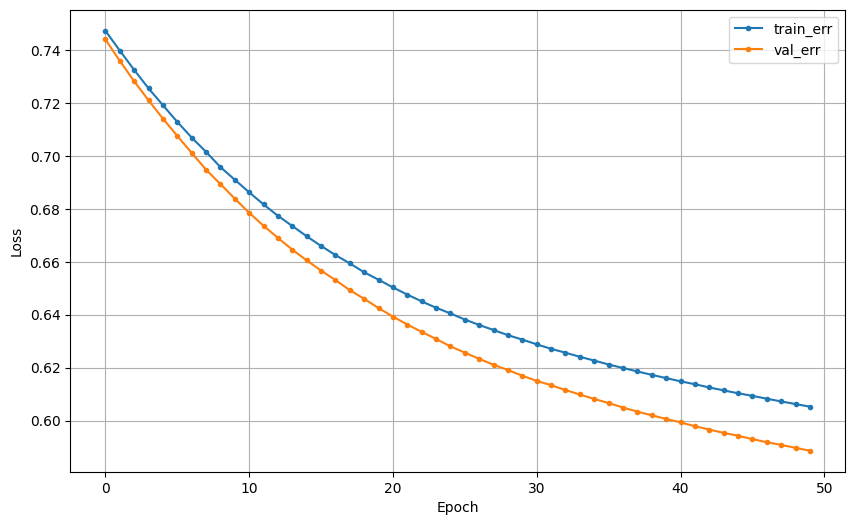

In [13]:
dl_history_plot(history)

### (3) 예측 및 검증

In [14]:
pred = model.predict(x_val)

# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)

9/9 [==============================] - 0s 3ms/step


In [16]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[166   4]
 [ 68  30]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       170
           1       0.88      0.31      0.45        98

    accuracy                           0.73       268
   macro avg       0.80      0.64      0.64       268
weighted avg       0.77      0.73      0.69       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [17]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [18]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [20]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [21]:
n = x_train.shape[1]
n

8

In [22]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential( Dense( 1, input_shape = (n, ), activation = 'sigmoid'))

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [23]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs = 50, validation_split=.2).history

Epoch 1/50
16/16 [==============================] - 1s 18ms/step - loss: 0.6299 - val_loss: 0.6125
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6059 - val_loss: 0.5917
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5865 - val_loss: 0.5728
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5709 - val_loss: 0.5563
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5569 - val_loss: 0.5430
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5463 - val_loss: 0.5319
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5372 - val_loss: 0.5230
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5290 - val_loss: 0.5153
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5226 - val_loss: 0.5083
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5170 - val_loss: 0.5021
Epoch 11/50
16/16 

* 학습결과 그래프

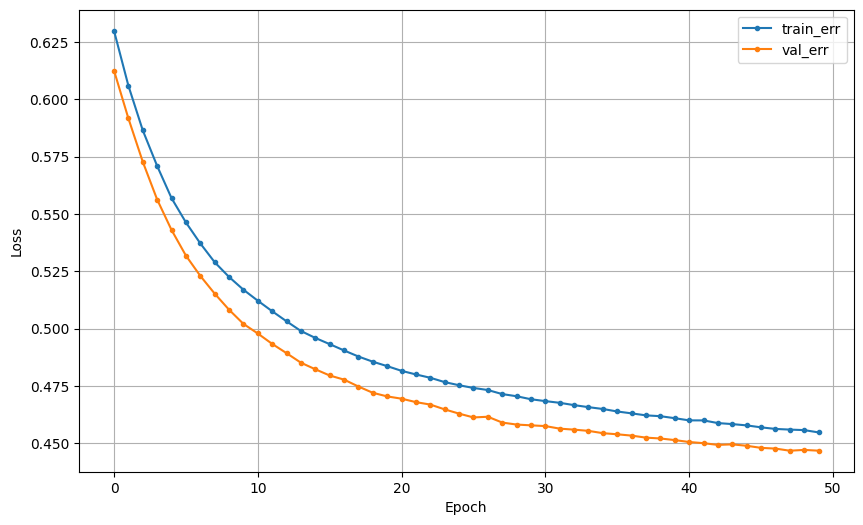

In [24]:
dl_history_plot(history)

* 예측 및 검증

In [25]:
pred2 = model.predict(x_val)
pred2 = np.where( pred2 >= .5 , 1, 0)
print(classification_report(y_val, pred2))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       170
           1       0.70      0.68      0.69        98

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [26]:
n = x_train.shape[1]
n

8

In [27]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([ Dense( 4, input_shape = (n ,), activation = 'relu'),
                      Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [28]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 [==============================] - 2s 26ms/step - loss: 0.6366 - val_loss: 0.5892
Epoch 2/50
16/16 [==============================] - 0s 13ms/step - loss: 0.5935 - val_loss: 0.5652
Epoch 3/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5667 - val_loss: 0.5394
Epoch 4/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5409 - val_loss: 0.5129
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5186 - val_loss: 0.4920
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4988 - val_loss: 0.4769
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4852 - val_loss: 0.4669
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4765 - val_loss: 0.4593
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4689 - val_loss: 0.4532
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4629 - val_loss: 0.4475
Epoch 11/50
16

* 학습결과 그래프

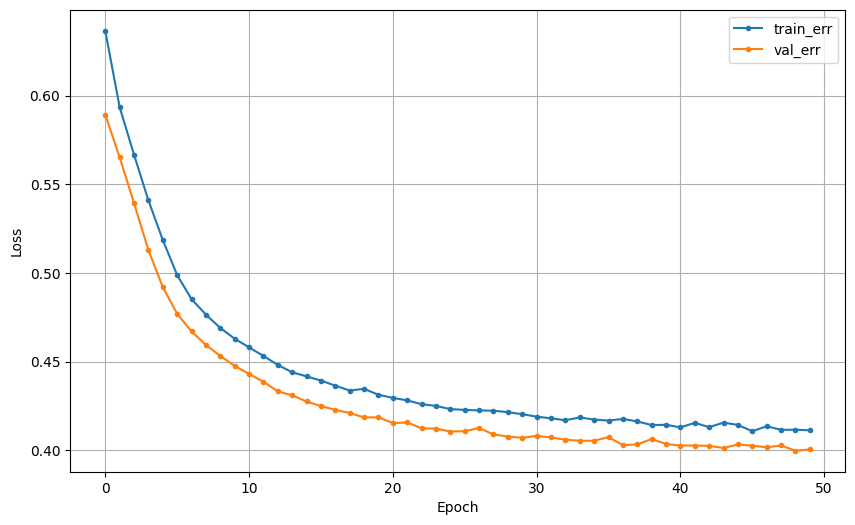

In [31]:
dl_history_plot(hist)

* 예측 및 검증

In [30]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 [==============================] - 0s 2ms/step


In [32]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred3))

[[166   4]
 [ 68  30]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       170
           1       0.76      0.59      0.67        98

    accuracy                           0.78       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.78      0.78       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [33]:
n

8

In [36]:
clear_session()
model1 = Sequential([Dense(16, input_shape=(n, ), activation='relu'),
                     Dense(1, activation='sigmoid')])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model1.compile(optimizer=Adam(0.1), loss='binary_crossentropy')
hist = model1.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 0.5767 - val_loss: 0.4712
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4628 - val_loss: 0.4197
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4480 - val_loss: 0.4260
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4381 - val_loss: 0.4003
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4265 - val_loss: 0.3962
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.4276 - val_loss: 0.4283
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4413 - val_loss: 0.4087
Epoch 8/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4367 - val_loss: 0.4151
Epoch 9/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4314 - val_loss: 0.4136
Epoch 10/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4113 - val_loss: 0.3940
Epoch 11/20
16/16 

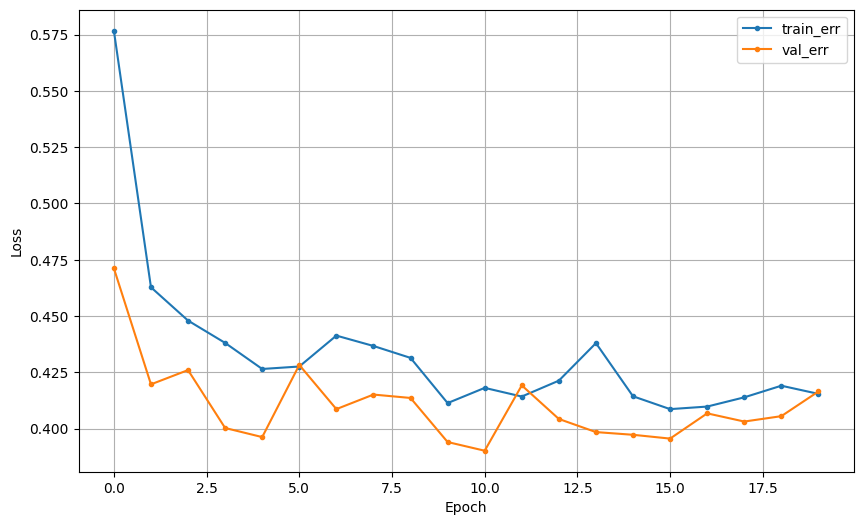

In [38]:
dl_history_plot(hist)

In [40]:
pred = model1.predict(x_val)
pred = np.where(pred >= 0.5, 1, 0)

9/9 [==============================] - 0s 3ms/step


In [44]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[148  22]
 [ 35  63]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       170
           1       0.74      0.64      0.69        98

    accuracy                           0.79       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.79      0.78       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [45]:
clear_session()
model2 = Sequential([Dense(16, input_shape=(n, ), activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(1, activation='sigmoid')])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model2.compile(optimizer=Adam(0.1), loss='binary_crossentropy')
hist = model2.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 1s 20ms/step - loss: 0.6072 - val_loss: 0.5143
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4673 - val_loss: 0.4678
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4408 - val_loss: 0.4563
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4559 - val_loss: 0.4008
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4555 - val_loss: 0.4101
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4344 - val_loss: 0.4082
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4347 - val_loss: 0.4019
Epoch 8/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4207 - val_loss: 0.4011
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4108 - val_loss: 0.3968
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4118 - val_loss: 0.3900
Epoch 11/50
16/16 

In [48]:
pred = model2.predict(x_val)
pred = np.where(pred >= 0.5, 1, 0)

9/9 [==============================] - 0s 5ms/step


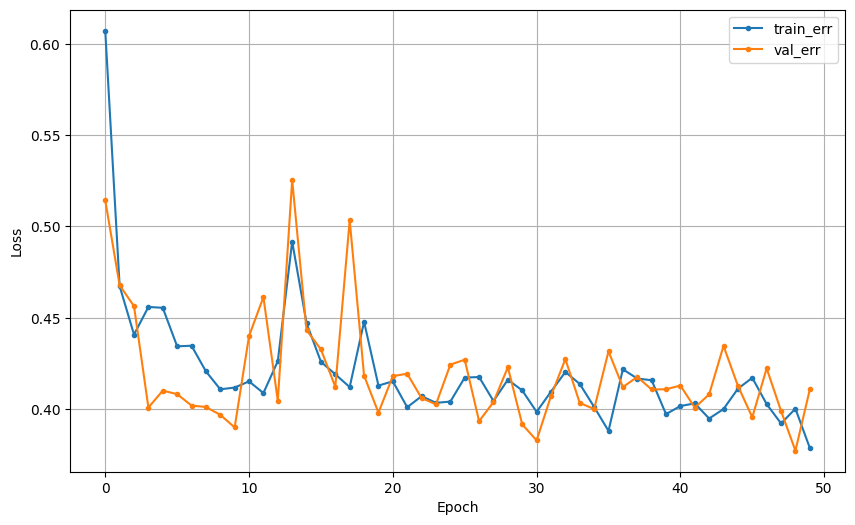

In [50]:
dl_history_plot(hist)

In [49]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[145  25]
 [ 36  62]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       170
           1       0.71      0.63      0.67        98

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [51]:
n

8

In [107]:
clear_session()
model3 = Sequential([Dense(16, input_shape=(n, ), activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(4, activation='relu'),
                     Dense(1, activation='sigmoid')])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model3.compile(optimizer=Adam(0.05), loss='binary_crossentropy')
model3.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 2s 21ms/step - loss: 0.6379 - val_loss: 0.5415
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5589 - val_loss: 0.4992
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4987 - val_loss: 0.4611
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4679 - val_loss: 0.4550
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4511 - val_loss: 0.4637
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4503 - val_loss: 0.4844
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4290 - val_loss: 0.4123
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4272 - val_loss: 0.4248
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4561 - val_loss: 0.4411
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4391 - val_loss: 0.4182
Epoch 11/50
16/16 

In [109]:
pred = model3.predict(x_val)
pred = np.where(pred >= 0.45, 1 , 0)

9/9 [==============================] - 0s 2ms/step


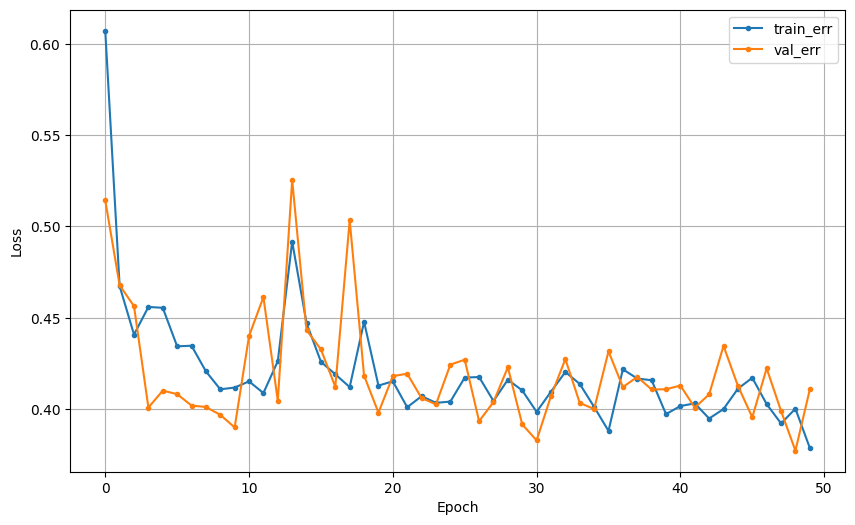

In [110]:
dl_history_plot(hist)

In [111]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[136  34]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       170
           1       0.68      0.74      0.71        98

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

